# Week 8 Assignment: NLP with NLTK
**Brian Roepke**

1. Watch the  week 8: NLP with NLTK (Natural Language Tool Kit) videos with topics leading to NER of text.  Read the session notebook and refer to NLTK chapters.
2. Load the dataset supplied as follows:
3. Using NLTK package perform the following
    4. Tokenize (sentence and word)
    5. Word Frequency analysis, including graphs 
    6. Preprocessing (stopwords, lemmatization and stemming)
    7. NER
    8. Noun Phrase Chunking

In [1]:
import re
import string
import nltk
import pandas as pd

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
from nltk.chunk import conllstr2tree

from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
f=open('chatbot.txt','r',errors = 'ignore')
raw_orig = f.read()

In [3]:
len(raw_orig)

12804

**Note:** Total number of characters `12,804`

## Tokenize

Tokenizing the text is the process of transforming the collection of characters, into words or sentences.

In [4]:
# Make lower
raw = raw_orig.lower()

In [5]:
# Remove Numbers
raw = re.sub('\w*\d\w*', '', raw)

In [6]:
tokenized_sent = sent_tokenize(raw)
print('number of sentences in review:', len(tokenized_sent))

print('first 5 sentences')
tokenized_sent[:5]

number of sentences in review: 73
first 5 sentences


['a chatbot (also known as a talkbot, chatterbot, bot, im bot, interactive agent, or artificial conversational entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.',
 'such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the turing test.',
 'chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.',
 'some chatterbots use sophisticated natural language processing systems, but many simpler systems scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.',
 'the term "chatterbot" was originally coined by michael mauldin (creator of the first verbot, julia) in  to describe these conversational programs.']

In [7]:
tokenized_word = word_tokenize(raw)
print('number of words in review:', len(tokenized_word))

print('first 15 word tokens')
tokenized_word[:15]

number of words in review: 2165
first 15 word tokens


['a',
 'chatbot',
 '(',
 'also',
 'known',
 'as',
 'a',
 'talkbot',
 ',',
 'chatterbot',
 ',',
 'bot',
 ',',
 'im',
 'bot']

## Word Frequency w/ Visualizations

In [8]:
fdist = FreqDist(tokenized_word)
fdist.most_common(10)

[(',', 127),
 ('the', 83),
 ('.', 72),
 ('a', 55),
 ('to', 48),
 ('of', 48),
 ('and', 43),
 ('in', 33),
 ('as', 30),
 ('chatbot', 27)]

**Note:**  You can see that the top words contain mostly `Stop Words` and punctuation.  We need to remove these to get a more accurate picture of the *meaningful* words.

## Stop Word Removal & Punctuation

Next is the process of removing stop words. Stop words are common words that appear but do not add any additional understanding. Words such as `a` and `the` are examples. These words also appear very frequently, become dominant in your analysis, and obscure meaningful words.

In [9]:
# create a list of english stop words from NLTK, including punctuation
useless_words = stopwords.words("english") + list(string.punctuation)
useless_words = useless_words + ["'s", "``", "''", "...", "e.g"]

# filter out the stop words
filtered_words = [word for word in tokenized_word if not word in useless_words]

print('number of words in review after stop words removal:', len(filtered_words))

print('first 15 words')
filtered_words [:10]

number of words in review after stop words removal: 1173
first 15 words


['chatbot',
 'also',
 'known',
 'talkbot',
 'chatterbot',
 'bot',
 'im',
 'bot',
 'interactive',
 'agent']

**Note:** A custom set of list items was added to capture special characters and sequences not found in stop words or punctuation.  The easiest way to do this is iterate through with multiple passes until you've sufficeintly removed as many edge cases as desired.  By simply appending them to the `useless_words` list, they're removed as part of the cleaning process.

In [10]:
fdist = FreqDist(filtered_words)
fdist.most_common(10)

[('chatbot', 27),
 ('chatbots', 19),
 ('used', 10),
 ('messenger', 10),
 ('user', 10),
 ('conversational', 9),
 ('program', 9),
 ('customer', 9),
 ('service', 9),
 ('also', 8)]

**Note:** The `FrequencyDistribution` shows much more meaningful words at the top.  The top two words should normally be one word when reduced to their stem or lemma.  This will be done later.

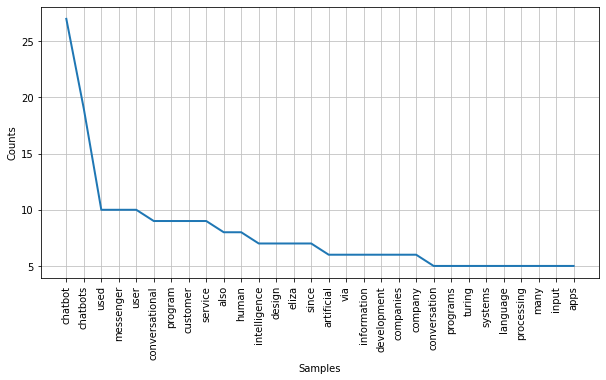

In [11]:
plt.figure(figsize=(10, 5))

fdist.plot(30, cumulative=False)
plt.show();

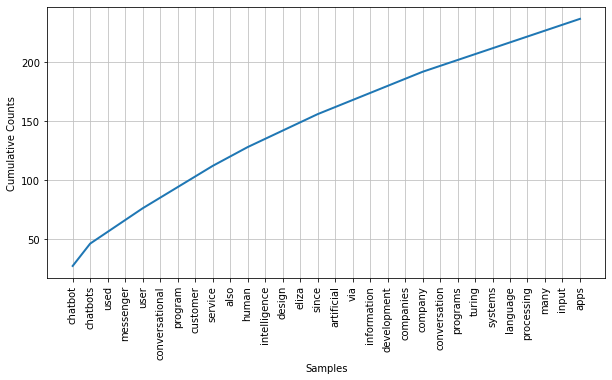

In [12]:
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=True);

## Stemming & Lemmatization

Stemming is removing characters from the beginning or end of a word to reduce it to its stem. Lemmatization is the process of determining the lemma, or canonical form of a word. An example of stemming would be to reduce `runs` to `run` as the base word dropping the `s`, where `ran` would not be in the same stem. However, lemmatization would classify `ran` in the same lemma. These techniques ensure that you have a corpus with the most meaningful words in their base forms.

In [13]:
ps = PorterStemmer()

# apply the stemmer to our words list
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

# create a list of orginal words and stemmed words for comparison
stemmed_list =[]
for w1, w2 in zip(filtered_words, stemmed_words):
    if w1 != w2:
        stemmed_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Stemmed Sentences word count:", len(stemmed_list))

# see how words were stemmed
print('\n first 10 stemmed words:')
stemmed_list[:10]

Filtered Sentences word count: 1173
Stemmed Sentences word count: 728

 first 10 stemmed words:


[('interactive', 'interact'),
 ('artificial', 'artifici'),
 ('conversational', 'convers'),
 ('entity', 'entiti'),
 ('computer', 'comput'),
 ('artificial', 'artifici'),
 ('intelligence', 'intellig'),
 ('conducts', 'conduct'),
 ('conversation', 'convers'),
 ('auditory', 'auditori')]

**Stemming Notes:**. There are some great examples of stemming in the list.  Often with stemming, the word is reduced, but it ends up with a form that isn't actually a word.  Such as `artificial` reducing to `artifici` and `computer` to `comput`.

In [14]:
lem = WordNetLemmatizer()

# apply the lemmatization to our words list
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w, 'v')) # use verb as pos

# create a list of orginal words and stemmed words for comparison
lemm_list =[]
for w1, w2 in zip(filtered_words, lemm_words):
    if w1 != w2:
        lemm_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Lemmatized Sentences word count:", len(lemm_list))

print('\n First 20 Lemmatized words:')
lemm_list[:20]

Filtered Sentences word count: 1173
Lemmatized Sentences word count: 234

 First 20 Lemmatized words:


[('known', 'know'),
 ('conducts', 'conduct'),
 ('programs', 'program'),
 ('designed', 'design'),
 ('passing', 'pass'),
 ('used', 'use'),
 ('purposes', 'purpose'),
 ('including', 'include'),
 ('sophisticated', 'sophisticate'),
 ('processing', 'process'),
 ('matching', 'match'),
 ('wording', 'word'),
 ('coined', 'coin'),
 ('programs', 'program'),
 ('accessed', 'access'),
 ('messaging', 'message'),
 ('classified', 'classify'),
 ('tools', 'tool'),
 ('games', 'game'),
 ('marketing', 'market')]

**Lemmatazation Notes:** Two things to notice in the Lemmatazaiton example to explain the difference.  First is that each word in the right side of the list is actually a word.  All of them make sense.  The second is that certain examples when reduced to their lemma take a different form than simply removing characters from the front or back.  For example, `including` is now `include` and `messaging` is now `message`.

This processed used *verb* as the part of speech.

In [15]:
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w, 'n')) # use noun as pos

# create a list of orginal words and stemmed words for comparison
lemm_list =[]
for w1, w2 in zip(filtered_words, lemm_words):
    if w1 != w2:
        lemm_list.append((w1,w2))
        
print("Filtered Sentences word count:", len(filtered_words))
print("Lemmatized Sentences word count:", len(lemm_list))

print('\n First 20 Lemmatized words:')
lemm_list[:20]

Filtered Sentences word count: 1173
Lemmatized Sentences word count: 155

 First 20 Lemmatized words:


[('conducts', 'conduct'),
 ('methods', 'method'),
 ('programs', 'program'),
 ('systems', 'system'),
 ('purposes', 'purpose'),
 ('systems', 'system'),
 ('systems', 'system'),
 ('programs', 'program'),
 ('assistants', 'assistant'),
 ('organizations', 'organization'),
 ('websites', 'website'),
 ('categories', 'category'),
 ('tools', 'tool'),
 ('games', 'game'),
 ('sports', 'sport'),
 ('utilities', 'utility'),
 ('users', 'user'),
 ('machines', 'machine'),
 ('ways', 'way'),
 ('workings', 'working')]

**Note:** Similar Process as above but using nouns as the Part of Speech.  You can see the same process, but with different word in their Noun form such as `utilities` to `utility`.

In [16]:
stemmed_words = [ps.stem(word) for word in filtered_words]

fdist = FreqDist(stemmed_words)
fdist.most_common(10)

[('chatbot', 46),
 ('use', 23),
 ('convers', 16),
 ('program', 15),
 ('user', 14),
 ('design', 12),
 ('compani', 12),
 ('servic', 11),
 ('process', 11),
 ('develop', 11)]

**Note:** After the stemming is completed on the `filtered_words` list, the duplicate `chatbot` has been reduced and words are in their stemmed format.  Note that `use` and `user` are different.  One is a noun and one is a verb.

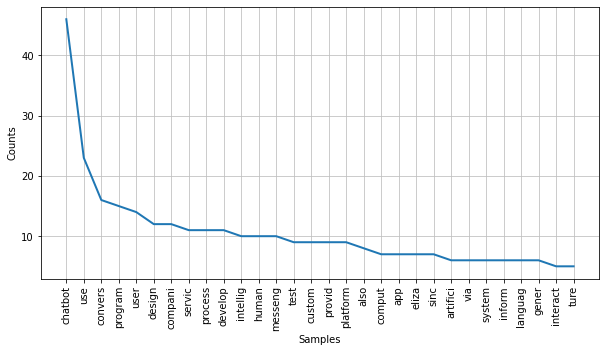

In [17]:
plt.figure(figsize=(10, 5))

fdist.plot(30, cumulative=False)
plt.show();

**Note:**  A slightly different shapped graph now that `stemming` is completed.

## Part of Speech Tagging

### Part of Speech Codes

<table cellpadding="2" cellspacing="2" border="0">
  <tbody><tr bgcolor="#DFDFFF" align="none"> 
    <td align="none"> 
      <div align="left">Number</div>
    </td>
    <td> 
      <div align="left">Tag</div>
    </td>
    <td> 
      <div align="left">Description</div>
    </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 1. </td>
    <td>CC </td>
    <td>Coordinating conjunction </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 2. </td>
    <td>CD </td>
    <td>Cardinal number </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 3. </td>
    <td>DT </td>
    <td>Determiner </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 4. </td>
    <td>EX </td>
    <td>Existential <i>there<i> </i></i></td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 5. </td>
    <td>FW </td>
    <td>Foreign word </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 6. </td>
    <td>IN </td>
    <td>Preposition or subordinating conjunction </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 7. </td>
    <td>JJ </td>
    <td>Adjective </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 8. </td>
    <td>JJR </td>
    <td>Adjective, comparative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 9. </td>
    <td>JJS </td>
    <td>Adjective, superlative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 10. </td>
    <td>LS </td>
    <td>List item marker </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 11. </td>
    <td>MD </td>
    <td>Modal </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 12. </td>
    <td>NN </td>
    <td>Noun, singular or mass </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 13. </td>
    <td>NNS </td>
    <td>Noun, plural </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 14. </td>
    <td>NNP </td>
    <td>Proper noun, singular </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 15. </td>
    <td>NNPS </td>
    <td>Proper noun, plural </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 16. </td>
    <td>PDT </td>
    <td>Predeterminer </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 17. </td>
    <td>POS </td>
    <td>Possessive ending </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 18. </td>
    <td>PRP </td>
    <td>Personal pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 19. </td>
    <td>PRP&#36</td>
    <td>Possessive pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 20. </td>
    <td>RB </td>
    <td>Adverb </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 21. </td>
    <td>RBR </td>
    <td>Adverb, comparative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 22. </td>
    <td>RBS </td>
    <td>Adverb, superlative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 23. </td>
    <td>RP </td>
    <td>Particle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 24. </td>
    <td>SYM </td>
    <td>Symbol </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 25. </td>
    <td>TO </td>
    <td><i>to</i> </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 26. </td>
    <td>UH </td>
    <td>Interjection </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 27. </td>
    <td>VB </td>
    <td>Verb, base form </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 28. </td>
    <td>VBD </td>
    <td>Verb, past tense </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 29. </td>
    <td>VBG </td>
    <td>Verb, gerund or present participle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 30. </td>
    <td>VBN </td>
    <td>Verb, past participle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 31. </td>
    <td>VBP </td>
    <td>Verb, non-3rd person singular present </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 32. </td>
    <td>VBZ </td>
    <td>Verb, 3rd person singular present </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 33. </td>
    <td>WDT </td>
    <td>Wh-determiner </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 34. </td>
    <td>WP </td>
    <td>Wh-pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 35. </td>
    <td>WP&#36</td>
    <td>Possessive wh-pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 36. </td>
    <td>WRB </td>
    <td>Wh-adverb 
</td></tr></tbody></table>

In [18]:
tokenized_sent = sent_tokenize(raw_orig)

[nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent[1:2]]

[[('Such', 'JJ'),
  ('programs', 'NNS'),
  ('are', 'VBP'),
  ('often', 'RB'),
  ('designed', 'VBN'),
  ('to', 'TO'),
  ('convincingly', 'VB'),
  ('simulate', 'VB'),
  ('how', 'WRB'),
  ('a', 'DT'),
  ('human', 'JJ'),
  ('would', 'MD'),
  ('behave', 'VB'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('conversational', 'JJ'),
  ('partner', 'NN'),
  (',', ','),
  ('thereby', 'RB'),
  ('passing', 'VBG'),
  ('the', 'DT'),
  ('Turing', 'NNP'),
  ('test', 'NN'),
  ('.', '.')]]

**Notes:** From the first sentence in the corpus, each word gets a POS tags that show us how this works.  Here are a couple examples:

 - `programs`, `partner`, and `test` are Nouns (NN and NNS for plural).
 - `Turing` is a Proper Noun (NNP) for someone's name.
 - `designed`, `passing`, and `behave` are examples of Verbs (VBN, VB, VBG).
 - `human` and `conversational` are Adjectives.

These can be combined with Named Entity Recogintion as well, that is next.

## Named Entity Recoginition

In [19]:
#tokenize sentences from the news article
tokenized_sent = sent_tokenize(raw_orig)

# review a specific setence
for s in tokenized_sent[5:6]:
    print(s)
    print('\n')
    
    # word tokenize and pos tagging
    word = pos_tag(word_tokenize(s))
    
    # chunking using named entity chunker
    res_chunks = ne_chunk(word)
    
    # Return a list of 3-tuples containing (word, tag, IOB-tag) eg:  [(token, pos_tag, name_entity_tag)] 
    print(tree2conlltags(res_chunks))
    print('\n')

Today, most chatbots are either accessed via virtual assistants such as Google Assistant and Amazon Alexa, via messaging apps such as Facebook Messenger or WeChat, or via individual organizations' apps and websites.


[('Today', 'NN', 'O'), (',', ',', 'O'), ('most', 'JJS', 'O'), ('chatbots', 'NNS', 'O'), ('are', 'VBP', 'O'), ('either', 'DT', 'O'), ('accessed', 'JJ', 'O'), ('via', 'IN', 'O'), ('virtual', 'JJ', 'O'), ('assistants', 'NNS', 'O'), ('such', 'JJ', 'O'), ('as', 'IN', 'O'), ('Google', 'NNP', 'B-PERSON'), ('Assistant', 'NNP', 'I-PERSON'), ('and', 'CC', 'O'), ('Amazon', 'NNP', 'B-PERSON'), ('Alexa', 'NNP', 'I-PERSON'), (',', ',', 'O'), ('via', 'IN', 'O'), ('messaging', 'VBG', 'O'), ('apps', 'NNS', 'O'), ('such', 'JJ', 'O'), ('as', 'IN', 'O'), ('Facebook', 'NNP', 'B-PERSON'), ('Messenger', 'NNP', 'I-PERSON'), ('or', 'CC', 'O'), ('WeChat', 'NNP', 'B-ORGANIZATION'), (',', ',', 'O'), ('or', 'CC', 'O'), ('via', 'IN', 'O'), ('individual', 'JJ', 'O'), ('organizations', 'NNS', 'O'), ("'"

**Note:**  The output above is the format `(Word, POS, NER)` with it's Part of Speech Tag and Named Entity.  Most of the words are not itentified as named entities and thefore only are displayed with their `IOB` tag and no named entity.  `IOB` tags are defined as follows:

>The IOB format (short for inside, outside, beginning) is a common tagging format for tagging tokens in a chunking task in computational linguistics (ex. named-entity recognition). It was presented by Ramshaw and Marcus in their paper "Text Chunking using Transformation-Based Learning", 1995 The B- prefix before a tag indicates that the tag is the beginning of a chunk, and an I- prefix before a tag indicates that the tag is inside a chunk. The B- tag is used only when a tag is followed by a tag of the same type without O tokens between them. An O tag indicates that a token belongs to no chunk.

https://en.wikipedia.org/wiki/Inside–outside–beginning_(tagging)

In [20]:
person = []
org = []
gpe = []
ner_types = set()

for s in tokenized_sent:
    pos = pos_tag(word_tokenize(s))
    res_chunks = ne_chunk(pos)

    for i in tree2conlltags(res_chunks):
        ner = i[2]
        if ner == 'O':  # skip Outiside labels
            continue;
        ner_types.add(ner) # Create a set of unique entries to ensure none are missing
        if ner.find('PERSON')> -1:   # matches on I-PERSON, B-PERSON
            person.append(i)
        elif ner.find('ORGANIZATION') > -1:
            org.append(i)
        elif ner.find('GPE') >-1:
            gpe.append(i)  

In [21]:
ner_types

{'B-GPE', 'B-ORGANIZATION', 'B-PERSON', 'I-GPE', 'I-ORGANIZATION', 'I-PERSON'}

In [22]:
print('PERSON:', len(person))
print('ORGANIZATION:', len(org))
print('GPE:', len(gpe))

PERSON: 52
ORGANIZATION: 70
GPE: 33


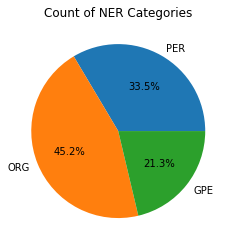

In [23]:
d = {'NER' : pd.Series([len(person), len(org), len(gpe)], index=['PER', 'ORG', 'GPE'])}

df_ner = pd.DataFrame(d)
df_ner.plot(kind='pie', y='NER', legend=False, 
            title="Count of NER Categories", 
            ylabel='', autopct='%1.1f%%');

A quick plot show the relative difference of each NER type in the corpus.

### Example POS & NERs

In [24]:
set(person[:10])

{('Alan', 'NNP', 'B-PERSON'),
 ('Alexa', 'NNP', 'I-PERSON'),
 ('Amazon', 'NNP', 'B-PERSON'),
 ('Assistant', 'NNP', 'I-PERSON'),
 ('Bot', 'NNP', 'B-PERSON'),
 ('Facebook', 'NNP', 'B-PERSON'),
 ('Google', 'NNP', 'B-PERSON'),
 ('Mauldin', 'NNP', 'I-PERSON'),
 ('Messenger', 'NNP', 'I-PERSON'),
 ('Michael', 'NNP', 'B-PERSON')}

In [25]:
set(org[:15])

{('Agence', 'NNP', 'B-ORGANIZATION'),
 ('Artificial', 'NNP', 'B-ORGANIZATION'),
 ('Conversational', 'NNP', 'I-ORGANIZATION'),
 ('ELIZA', 'NN', 'B-ORGANIZATION'),
 ('ELIZA', 'NNP', 'B-ORGANIZATION'),
 ('HR', 'NNP', 'B-ORGANIZATION'),
 ('IM', 'NNP', 'B-ORGANIZATION'),
 ('Intelligence', 'NNP', 'B-ORGANIZATION'),
 ('Introduction', 'NN', 'B-ORGANIZATION'),
 ('Machinery', 'NN', 'B-ORGANIZATION'),
 ('PARRY', 'NNP', 'B-ORGANIZATION'),
 ('WeChat', 'NNP', 'B-ORGANIZATION'),
 ('YOUR', 'NNP', 'B-ORGANIZATION')}

In [26]:
set(gpe[:15])

{('American', 'NNP', 'B-GPE'),
 ('Background', 'NN', 'B-GPE'),
 ('ELIZA', 'NNP', 'B-GPE'),
 ('Interface', 'NN', 'B-GPE'),
 ('Jabberwacky', 'NNP', 'B-GPE'),
 ('Joseph', 'NNP', 'B-GPE'),
 ('Julia', 'NNP', 'B-GPE'),
 ('Turing', 'NNP', 'B-GPE'),
 ('Verbot', 'NNP', 'B-GPE'),
 ('Weizenbaum', 'NNP', 'B-GPE'),
 ('Weizenbaum', 'NNP', 'I-GPE')}

**Note:** There were only three NER categories identified in the text corpus, `PERSON`, `ORGANIZATION` and `GEO POLITICAL ENTITY`.  In these we can see that the information is imperfect.  Some examples of People are actually company names and product names, others are accurate.  In the Organization category, potentially only "HR" is a correct match, but arguably not.  Similar in the GPE category, there appears to be less successful hits;  `American` is the most accurate.

**Additional Example of Counting NER Tags**

In [27]:
ner_categories = defaultdict(int)

# for each sent
for s in tokenized_sent:
    # tokenize the sentence into words
    pos = pos_tag(word_tokenize(s))
    
    res_chunks = ne_chunk(pos)      #  tagged tokens
       
    for c in tree2conlltags(res_chunks):
        ner = c[2]
        if ner == 'O':  # skip Outiside labels
            continue;
        ner_categories[ner] += 1

ner_categories

defaultdict(int,
            {'B-PERSON': 34,
             'B-ORGANIZATION': 56,
             'I-ORGANIZATION': 14,
             'B-GPE': 31,
             'I-PERSON': 18,
             'I-GPE': 2})

**Note:** In this version it leaves in the `IOB` tag showing different types of organizations and GPEs. 

## Noun Phrase Chunking

### Regular Expression Cheat Sheet
**Identifiers:**

 - `\d` = any number
 - `\D` = anything but a number
 - `\s` = space
 - `\S` = anything but a space
 - `\w` = any letter
 - `\W` = anything but a letter
 - `.` = any character, except for a new line
 - `\b` = space around whole words
 - `\.` = period. must use backslash, because . normally means any character.

**Modifiers:**

 - `{1,3}` = for digits, u expect `1-3` counts of digits, or "places"
 - `+` = match 1 or more
 - `?` = match 0 or 1 repetitions.
 - `*` = match 0 or MORE repetitions
 - `$` = matches at the end of string
 - `^` = matches start of a string
 - `|` = matches either/or. Example `x|y` = will match either `x` or `y`
 - `[]` = range, or "variance"
 - `{x}` = expect to see this amount of the preceding code.
 - `{x,y}` = expect to see this `x-y` amounts of the precedng code

**White Space Charts:**

 - `\n` = new line
 - `\s` = space
 - `\t` = tab
 - `\e` = escape
 - `\f` = form feed
 - `\r` = carriage return

**Characters to REMEMBER TO ESCAPE IF USED!**

 - `. + * ? [ ] $ ^ ( ) { } | \`

**Brackets:**

 - `[]` = quanttative = will find either quantitative, or quantatative.
 - `[a-z]` = return any lowercase letter a-z
 - `[1-5a-qA-Z]` = return all numbers 1-5, lowercase letters a-q and uppercase A-Z

### POS Tagging Example

**POS Tagging**
First, a quick demonstration on how POS tagging looks with a couple of words, `artificial` and `intelligence` back to back.  If we wanted to look for **chunks** that fall into this pattern, we would want to search for `JJ` followed by `NN`.

In [28]:
print('',pos_tag(word_tokenize("artificial")), '\n', pos_tag(word_tokenize("intelligence")))

 [('artificial', 'JJ')] 
 [('intelligence', 'NN')]


**NNP:**  Another example is a Proper, Singular Noun of `Alan`.

In [29]:
pos_tag(word_tokenize("Alan"))

[('Alan', 'NNP')]

### Noun Phrase Chunking the Corpus

In [30]:
def reg_chunker(sents, begin, end, expression):

    sent = sents[begin:end] # specific sentence from the article (eg:list of one)
    sent = ' '.join(sent)       # convert list to string

    sent = pos_tag(word_tokenize(sent)) # pos tagging

    pattern = expression
    cp = nltk.RegexpParser(pattern) # chunkParser
    chunked = cp.parse(sent)

    # chunked.draw()   # visuall
    # print(chunked)   # prints the entire tree

    # prints only the noun chunks matching the pattern, ignoring the rest
    for subtree in chunked.subtrees(filter=lambda t: t.label() == 'NP'):
        print(subtree)

**Display The Sentences to Chunk**

In [31]:
' '.join(tokenized_sent[1:7])

'Such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the Turing test. Chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition. Some chatterbots use sophisticated natural language processing systems, but many simpler systems scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database. The term "ChatterBot" was originally coined by Michael Mauldin (creator of the first Verbot, Julia) in 1994 to describe these conversational programs. Today, most chatbots are either accessed via virtual assistants such as Google Assistant and Amazon Alexa, via messaging apps such as Facebook Messenger or WeChat, or via individual organizations\' apps and websites. Chatbots can be classified into usage categories such as conversational commerce (e-commerce via chat), analytics, c

**Chunk 1:**  Adjective Follwed by Singular Noun

In [32]:
reg_chunker(tokenized_sent, 1, 9, r'NP: {<JJ>+<NN>}')

(NP conversational/JJ partner/NN)
(NP sophisticated/JJ natural/JJ language/NN)
(NP many/JJ simpler/NN)
(NP similar/JJ wording/NN)
(NP conversational/JJ commerce/NN)
(NP famous/JJ article/NN)
(NP Computing/JJ Machinery/NN)
(NP human/JJ judge/NN)
(NP conversational/JJ content/NN)
(NP real/JJ human/NN)


**Results:**  
When passing in this `RegEx` pattern, we can see some of the chunks resulting:
 - sophisticated natural language
 - famous article
 - Computing Machinery
 - human judge
 - real human

**Chunk 2:**  Noun followed by Noun

In [33]:
reg_chunker(tokenized_sent, 1, 7, r'NP: {<NN.?>+<NN.?>}')

(NP Turing/NNP test/NN)
(NP dialog/NN systems/NNS)
(NP customer/NN service/NN)
(NP information/NN acquisition/NN)
(NP language/NN processing/NN systems/NNS)
(NP simpler/NN systems/NNS)
(NP wording/NN pattern/NN)
(NP Michael/NNP Mauldin/NNP)
(NP Google/NNP Assistant/NNP)
(NP Amazon/NNP Alexa/NNP)
(NP Facebook/NNP Messenger/NNP)
(NP customer/NN support/NN)
(NP developer/NN tools/NNS)


**Results:**  
When passing in this `RegEx` pattern, we can see some of the chunks resulting:
 - customer service
 - language processing systems
 - Michael Mauldin
 - Google Assistant
 - Amazon Alexa
 - Facebook Messenger
 - Alan Turing
 
Some of these are a little more interesting becasue we can see the concept of extracing proper names from a corpus of text, a useful concept using these patterns.